<center><h1>Project III<br><br>
    Telecome Prepaid Mega-line Plan Analysis</h1></center>

<b>Description:</b>

As an analyst at a telecommunications services company, we been asked to perform an analysis of the prepaid service on our mega-line "Surf" and "Ultimate" programs to see which one is more revenue to the company in order to adjust the advertising
budget.

For this purpose, we will take 500 of our users how connected to this service and perform an in-depth test in order to know:

- Check our users behavior and used in 2018 

- Find which prepaid plan bring our company more revenue

- Help our marketing department to make better advertising budget decisions

<b>Prepaid Mega-line Plan:</b>

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

<b>Surf:</b>
- Monthly charge: \$20
- 500 monthly minutes, 50 texts and 15 GB of data
- After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: \$10
    
<b>Ultimate:</b>
- Monthly charge: \$70
- 3000 monthly minutes, 1000 text messages and 30 GB of data
- After exceeding the package limits:
    - 1 minute: 1 cent
    - 1 text message: 1 cent
    - 1 GB of data: \$7

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b style="font-size: 17px;">index:</b>
    
<a href="#open_the_data">I - Open data and study the general info</a>
    
<a href="#data_preparation">II - Prepare the data</a>
    
<a href="#analyze_data">III - Analyze the data</a>
    
<a href="#test_hypothesis">VI - Test the hypothesis</a>
    
<a href="#general_conclusion">V - General conclusion</a>
</div>
<br>
<hr>

<b id="open_the_data" style="font-size: 25px;">I - Open data and study the general info:</b><br><br>Loading all the libraries:*pandas*,*numpy*,*matplotlib* etc.

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
import re 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns
sns.set_style("darkgrid")

# import the math and scipy packages for statistical analysis
import math as mt
from math import factorial
from scipy import stats as st

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display_html
from itertools import chain,cycle

# import datetime package
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# Load the data files
try:
    # Megaline data users
    users = pd.read_csv('/datasets/megaline_users.csv')
    
    # Megaline data calls
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    
    # Megaline data messages
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    
    # Megaline data internet
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    
    # Megaline data plans
    plans = pd.read_csv('/datasets/megaline_plans.csv')    

except:
    print('There is an issue to import Data')
else:
    print('Import Data successfully')

Import Data successfully


<b style="font-size: 20px;">First look at our datasets:</b><br>(*Head*,*Tail*,*Info*,*Describe*,*Zeros*,*Nan*,*Shape*,*Duplicate*,*Dtype etc*')

In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))  
        
# function to display general information about the dataset
def general_info(df):
    print
    print("\033[1m" + '-'*100 + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print('-'*100)
    print("\033[1m" + 'Head:')  
    display(df.head(5))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail(5))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Describe include all:')
    print()
    display(df.describe(include='all'))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(df.isnull().sum())
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print('-'*100)
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print('-'*100)
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()
    print('-'*100)

In [4]:
# information about our datasets 
print()
print()
print("\033[1m" + 'info about `users` dataset')
general_info(users)
print()
print()
print()
print("\033[1m" + 'info about `calls` dataset')
general_info(calls)
print()
print()
print("\033[1m" + 'info about `messages` dataset')
general_info(messages)
print()
print()
print("\033[1m" + 'info about `internet` dataset')
general_info(internet)
print()
print()
print("\033[1m" + 'info about `plans` dataset')
general_info(plans)
print()



info about `users` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
user_id,int64,500,0,0.000
first_name,object,500,0,0.000
last_name,object,500,0,0.000
age,int64,500,0,0.000
city,object,500,0,0.000
reg_date,object,500,0,0.000
plan,object,500,0,0.000
churn_date,object,34,466,0.932



----------------------------------------------------------------------------------------------------
Head:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



----------------------------------------------------------------------------------------------------

Tail:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None


----------------------------------------------------------------------------------------------------

Describe:



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000



----------------------------------------------------------------------------------------------------

Describe include all:



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
count,500.000000,500,500,500.000000,500,500,500,34
unique,NaN,458,399,NaN,73,266,2,29
top,NaN,Leonila,Morrison,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-18
freq,NaN,3,3,NaN,80,5,339,3
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN



----------------------------------------------------------------------------------------------------

nulls in the columns:



user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

user_id 0
first_name 0
last_name 0
age 0
city 0
reg_date 0
plan 0
churn_date 0


None


----------------------------------------------------------------------------------------------------

Shape: (500, 8)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object


----------------------------------------------------------------------------------------------------



info about `calls` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
id,object,137735,0,0.0
user_id,int64,137735,0,0.0
call_date,object,137735,0,0.0
duration,float64,137735,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



----------------------------------------------------------------------------------------------------

Tail:


,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None


----------------------------------------------------------------------------------------------------

Describe:



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



----------------------------------------------------------------------------------------------------

Describe include all:



,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1396_95,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000



----------------------------------------------------------------------------------------------------

nulls in the columns:



id           0
user_id      0
call_date    0
duration     0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

id 0
user_id 0
call_date 0
duration 26834


None


----------------------------------------------------------------------------------------------------

Shape: (137735, 4)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


id            object
user_id        int64
call_date     object
duration     float64
dtype: object


----------------------------------------------------------------------------------------------------


info about `messages` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
id,object,76051,0,0.0
user_id,int64,76051,0,0.0
message_date,object,76051,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



----------------------------------------------------------------------------------------------------

Tail:


,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None


----------------------------------------------------------------------------------------------------

Describe:



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



----------------------------------------------------------------------------------------------------

Describe include all:



,id,user_id,message_date
count,76051,76051.000000,76051
unique,76051,NaN,351
top,1396_95,NaN,2018-12-28
freq,1,NaN,702
mean,NaN,1245.972768,NaN
std,NaN,139.843635,NaN
min,NaN,1000.000000,NaN
25%,NaN,1123.000000,NaN
50%,NaN,1251.000000,NaN
75%,NaN,1362.000000,NaN



----------------------------------------------------------------------------------------------------

nulls in the columns:



id              0
user_id         0
message_date    0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

id 0
user_id 0
message_date 0


None


----------------------------------------------------------------------------------------------------

Shape: (76051, 3)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


id              object
user_id          int64
message_date    object
dtype: object


----------------------------------------------------------------------------------------------------


info about `internet` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
id,object,104825,0,0.0
user_id,int64,104825,0,0.0
session_date,object,104825,0,0.0
mb_used,float64,104825,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



----------------------------------------------------------------------------------------------------

Tail:


,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None


----------------------------------------------------------------------------------------------------

Describe:



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



----------------------------------------------------------------------------------------------------

Describe include all:



,id,user_id,session_date,mb_used
count,104825,104825.000000,104825,104825.000000
unique,104825,NaN,351,NaN
top,1080_96,NaN,2018-12-24,NaN
freq,1,NaN,851,NaN
mean,NaN,1242.496361,NaN,366.713701
std,NaN,142.053913,NaN,277.170542
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1122.000000,NaN,136.080000
50%,NaN,1236.000000,NaN,343.980000
75%,NaN,1367.000000,NaN,554.610000



----------------------------------------------------------------------------------------------------

nulls in the columns:



id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

id 0
user_id 0
session_date 0
mb_used 13747


None


----------------------------------------------------------------------------------------------------

Shape: (104825, 4)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object


----------------------------------------------------------------------------------------------------


info about `plans` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
messages_included,int64,2,0,0.0
mb_per_month_included,int64,2,0,0.0
minutes_included,int64,2,0,0.0
usd_monthly_pay,int64,2,0,0.0
usd_per_gb,int64,2,0,0.0
usd_per_message,float64,2,0,0.0
usd_per_minute,float64,2,0,0.0
plan_name,object,2,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



----------------------------------------------------------------------------------------------------

Tail:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None


----------------------------------------------------------------------------------------------------

Describe:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000



----------------------------------------------------------------------------------------------------

Describe include all:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surf
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142,NaN
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000,NaN
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000,NaN
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000,NaN



----------------------------------------------------------------------------------------------------

nulls in the columns:



messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

messages_included 0
mb_per_month_included 0
minutes_included 0
usd_monthly_pay 0
usd_per_gb 0
usd_per_message 0
usd_per_minute 0
plan_name 0


None


----------------------------------------------------------------------------------------------------

Shape: (2, 8)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


----------------------------------------------------------------------------------------------------



<b style="font-size: 20px;">Description of the data:</b>

<b style="font-size: 17px;">The `users` dataset (data on users):</b>

<b style="font-size: 14px;">`Dataseat rows`: 500</b>

`user_id` - unique user identifier

`first_name` - user's name

`last_name`- user's last name

`age` - user's age (years)

`reg_date` - subscription date (dd, mm, yy)

`churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)

`city` — user's city of residence

`plan` - calling plan name

<br>

<b style="font-size: 17px;">The `calls` dataset (data on calls):</b>

<b style="font-size: 14px;">`Dataseat rows`: 137735</b>

`id` - unique call identifie

`call_date` - call date

`duration`- call duration (in minutes)

`user_id` - the identifier of the user making the call
<br><br>

<b style="font-size: 17px;">The `messages` dataset (data on texts):</b>

<b style="font-size: 14px;">`Dataseat rows`: 76051</b>

`id` - unique text message identifier

`message_date` - text message date

`user_id`- the identifier of the user sending the text
<br><br>

<b style="font-size: 17px;">The `internet` dataset (data on web sessions):</b>

<b style="font-size: 14px;">`Dataseat rows`: 104825</b>

`id` — unique session identifier

`mb_used` — the volume of data spent during the session (in megabytes)

`session_date` — web session date

`user_id` — user identifier
<br><br>

<b style="font-size: 17px;">The `plans` dataset (data on the plans):</b>

<b style="font-size: 14px;">`Dataseat rows`: 2</b>

`plan_name` — calling plan name

`usd_monthly_fee` — monthly charge in US dollars

`minutes_included` — monthly minute allowance

`messages_included` — monthly text allowance

`mb_per_month_included` — data volume allowance (in megabytes)

`usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)

`usd_per_message` — price per text after exceeding the package limits

`usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)
<br><br>

<b style="font-size: 17px;">Missing values:</b>

<b>`users dataset`:</b>

`churn_date `: only 34 of 500 rows (diffrence of 466 rows)
<br><br>

<b style="font-size: 17px;">Users by plan:</b>

`surf `: 68% 

`ultimate `: 32%
<br><br>

<b style="font-size: 17px;">Dtype issues:</b>

<b>`users Dataset`:</b>

`reg_date `:   Object need to be datetime

`churn_date `: Object need to be datetime
<br>
<br>
<b>`calls Dataset`:</b>

`call_date`:  Object need to be datetime
<br>
<br>
<b>`messages Dataset`:</b>

`message_date `: Object need to be datetime
<br>
<br>
<b>`internet Dataset`:</b>

`session_date `: Object need to be datetime
<br><br>

<b style="font-size: 20px;">Intermediate conclusions</b>

- 500 users 68% `surf` 32% `ultimate`, 
<ul>
    <li>~137k calls</li>
    <li>~76k messages</li>
    <li>~104k of data</li>
    </ul>
    
    
- Missing 466 values in `users` dataset `churn_date`


- No duplicates


- Dtype values issue in **calls:** `call_date` , **users:** `reg_date` , `churn_date` , **messages:** `message_date` ,**internet:** `session_date` all of them show as **object** which more correct is **datetime**


<b id="data_preparation" style="font-size: 25px;">II - Prepare the data</b><br><br><b style="font-size: 15px;">Convert data to the necessary dtypes</b>

In [5]:
# apply numpy vectorizing to id
get_id = np.vectorize(lambda x: re.sub('.*_', '' ,  x))

In [6]:
# change date type to datetime and split into day, month and year
def new_date_features(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['day'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df      

<br>
<b style="font-size: 15px;">Eliminate errors in the datasets:</b>

<b style="font-size: 15px;">Prepare `users` dataset:</b>

In [7]:
#fillna the missing values for churn_date to end of 2018 
users['churn_date'] = users['churn_date'].replace(np.nan, "2018-12-31")

# change the `reg_date` in the `users` to datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# change the `churn date` to datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
users.columns = ['user', 'first name', 'last name', 'age', 'city', 'reg_date', 'plan', 'churn date']

# create categorical variable for whether user churn or not
users['churn'] = np.where(users['churn date'].isnull(), 'No', 'Yes')

users.head(10) 

,user,first name,last name,age,city,reg_date,plan,churn date,churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,Yes
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,Yes
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,Yes
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,Yes
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,Yes
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,2018-12-31,Yes
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Yes
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,2018-12-31,Yes
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,Yes
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,2018-12-31,Yes


In [8]:
# check users values
pd.concat([users.dtypes,users.count(),users.isna().sum(),users.isna().sum()/len(users)], 
          keys=['type','count','na','na%'],axis=1)

,type,count,na,na%
user,int64,500,0,0.0
first name,object,500,0,0.0
last name,object,500,0,0.0
age,int64,500,0,0.0
city,object,500,0,0.0
reg_date,datetime64[ns],500,0,0.0
plan,object,500,0,0.0
churn date,datetime64[ns],500,0,0.0
churn,object,500,0,0.0


In our dataset `users`, we had 466 values missing in the `churn_date` column that been fix be fillna them with the date of the last year of 2018,  also we change the dtype from **object** to **datetime** and we add `churn` column that check if the user is still conneted or not by show Yes or No in the status.

<b style="font-size: 15px;">Prepare `calls` dataset:</b>

In [9]:
# change the `calls_date` to datetime datatype
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
calls['id'] = get_id(calls['id'])
calls = new_date_features(calls)
calls['call type'] = np.where(calls['duration'] == 0, 'Miss', 'Answered')
calls['duration'] = (
    calls['duration'].apply(np.ceil).astype('int64')
)
# rename columns
calls.columns = ['id', 'user', 'call date', 'duration', 'day', 'month', 'year', 'call type'] 
calls.head(10)

,id,user,call date,duration,day,month,year,call type
0,93,1000,2018-12-27,9,Thursday,December,2018,Answered
1,145,1000,2018-12-27,14,Thursday,December,2018,Answered
2,247,1000,2018-12-27,15,Thursday,December,2018,Answered
3,309,1000,2018-12-28,6,Friday,December,2018,Answered
4,380,1000,2018-12-30,5,Sunday,December,2018,Answered
5,388,1000,2018-12-31,3,Monday,December,2018,Answered
6,510,1000,2018-12-27,6,Thursday,December,2018,Answered
7,521,1000,2018-12-28,15,Friday,December,2018,Answered
8,530,1000,2018-12-28,6,Friday,December,2018,Answered
9,544,1000,2018-12-26,5,Wednesday,December,2018,Answered


At the `calls` dataset we found that there isn't any missing values be we found an error that show less than a 1 minute `duration` calls we fix it be round up the call to 1 minute for less than one and we round up the secands in calls other calls that not show perfect minutes calls. we all add new column that show if it was answerd or miss call.

<b style="font-size: 15px;">Prepare `Messages` dataset:</b>

In [10]:
# change the `message_date` in the `messages` to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
messages['id'] = get_id(messages['id'])
messages = new_date_features(messages)
messages.columns = ['id', 'user', 'message date', 'day', 'month', 'year']
messages.head()

,id,user,message date,day,month,year
0,125,1000,2018-12-27,Thursday,December,2018
1,160,1000,2018-12-31,Monday,December,2018
2,223,1000,2018-12-31,Monday,December,2018
3,251,1000,2018-12-27,Thursday,December,2018
4,255,1000,2018-12-26,Wednesday,December,2018


<b>Prepare `Internet` Data</b>

In [11]:
# change the `session_date` in `internet` to datetime
internet['mb_used'] = (internet.mb_used).apply(np.ceil).astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
internet['id'] = get_id(internet['id'])
internet = new_date_features(internet)
internet.columns = ['id', 'user', 'session date', 'data used', 'day', 'month', 'year'] # rename columns
internet.head()

,id,user,session date,data used,day,month,year
0,13,1000,2018-12-29,90,Saturday,December,2018
1,204,1000,2018-12-31,0,Monday,December,2018
2,379,1000,2018-12-28,661,Friday,December,2018
3,413,1000,2018-12-26,271,Wednesday,December,2018
4,442,1000,2018-12-27,881,Thursday,December,2018


<b>Prepare `plans` Data</b>

In [12]:
# rename `plans` columns
plans.columns = ['messages included', 'data volume per month', 'minutes included', 'monthly fee', 'price per gb', 'price per message', 'price per minute', 'plan']
plans.head()

,messages included,data volume per month,minutes included,monthly fee,price per gb,price per message,price per minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<br>
<b style="font-size: 20px;">Let's makes some calculations</b>

Use the new and improve datasets , we can find for each user :

- 'call' per month

- 'text messages' per month

- 'data' per month 

- Monthly revenue from each user (according to consumption to the plan they connect to: total number of calls, text messages, data, multiply the result by the calling plan value; add the monthly charge depending on the plan)

In [13]:
# function to display tables side by side for analysis
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h6>{title}</h6>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    
# check if all users are accounted for in other tables
print(calls['user'].nunique())
print(users['user'].nunique())
print(messages['user'].nunique())
print(internet['user'].nunique())

481
500
402
489


<br><b style="font-size: 15px;">User `calls` per month:</b><br>

In [14]:
# calls per user per month
calls_per_month = calls.groupby(['user', 'month']).agg({'id': 'count'}).rename(columns={'id': 'calls made'})#.reset_index()
display_side_by_side(calls_per_month.head(), calls_per_month.describe(), titles=[
    'Head of calls per month', 'Describe calls per month'])

# minutes per user per month
mins_per_month = calls.groupby(['user', 'month']).agg({'duration': 'sum'}).rename(columns={'duration': 'minutes spent'})
display_side_by_side(mins_per_month.head(), mins_per_month.describe(), titles=[
    'Head of minutes per month', 'Describe minutes per month'])

Head of calls per month 
 
 
 
 
 calls made 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 16 
 
 
 1001 
 August 
 27 
 
 
 December 
 56 
 
 
 November 
 64 
 
 
 October 
 65 
 
 
 Describe calls per month 
 
 
 
 calls made 
 
 
 
 
 count 
 2258.000000 
 
 
 mean 
 60.998671 
 
 
 std 
 31.770869 
 
 
 min 
 1.000000 
 
 
 25% 
 39.000000 
 
 
 50% 
 60.000000 
 
 
 75% 
 80.000000 
 
 
 max 
 205.000000

Head of minutes per month 
 
 
 
 
 minutes spent 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 124 
 
 
 1001 
 August 
 182 
 
 
 December 
 412 
 
 
 November 
 426 
 
 
 October 
 393 
 
 
 Describe minutes per month 
 
 
 
 minutes spent 
 
 
 
 
 count 
 2258.000000 
 
 
 mean 
 435.937555 
 
 
 std 
 231.972343 
 
 
 min 
 0.000000 
 
 
 25% 
 275.000000 
 
 
 50% 
 429.000000 
 
 
 75% 
 574.750000 
 
 
 max 
 1510.000000

In the number of calls made per month, we can see that ~1499 users made calls out of the 2258 users.

the **highest call rate** made 205 calls and spend a total of 1510 minutes , in the other hand the **lowest call rate** is 1 phone call that been miss since it's 0 minute.

since the mean of `minutes spent` is greater than the median , we can expect distribution of skewed right, This means the data could contain outliers

<br><b style="font-size: 15px;">User `messages` per month:</b><br>

In [15]:
#messages per user per month
messages_per_month = messages.groupby(['user', 'month']).agg({'id': 'count'}).rename(columns={'id': 'messages sent'})
display_side_by_side(messages_per_month.head(), messages_per_month.describe(), titles=[
    'Head of messages per month', 'Describe messages per month'])

Head of messages per month 
 
 
 
 
 messages sent 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 11 
 
 
 1001 
 August 
 30 
 
 
 December 
 44 
 
 
 November 
 36 
 
 
 October 
 53 
 
 
 Describe messages per month 
 
 
 
 messages sent 
 
 
 
 
 count 
 1806.000000 
 
 
 mean 
 42.110188 
 
 
 std 
 33.122931 
 
 
 min 
 1.000000 
 
 
 25% 
 17.000000 
 
 
 50% 
 34.000000 
 
 
 75% 
 59.000000 
 
 
 max 
 266.000000

On the average, about 1806 messages was sent per user per month , when the **highest messages rate** 266 messages and on **lowest messages rate** is 1 message. 

since the mean of `messages spent` is greater than the median , we can expect distribution of skewed right, This means the data could contain outliers.

<br><b style="font-size: 15px;">User `Internet` per month:</b><br>

In [16]:
# internet traffic per user per month
internet_traffic_month = (internet.groupby(['user', 'month']).agg({'data used': 'sum'})/1024).apply(np.ceil)
display_side_by_side(internet_traffic_month.head(), internet_traffic_month.describe(), titles=[
    'Head of data used per month', 'Describe data used per month'])

Head of data used per month 
 
 
 
 
 data used 
 
 
 user 
 month 
 
 
 
 
 
 1000 
 December 
 2.0 
 
 
 1001 
 August 
 7.0 
 
 
 December 
 19.0 
 
 
 November 
 19.0 
 
 
 October 
 22.0 
 
 
 Describe data used per month 
 
 
 
 data used 
 
 
 
 
 count 
 2277.000000 
 
 
 mean 
 17.007466 
 
 
 std 
 7.699111 
 
 
 min 
 1.000000 
 
 
 25% 
 13.000000 
 
 
 50% 
 17.000000 
 
 
 75% 
 21.000000 
 
 
 max 
 70.000000

From our volume of internet data used per month, we can see that ~1499 users used data out of 2277 users. the average is 17gb of data was used. when the **highest data rate** is 70gb and the **lowest data rate** 1gb only.

Since the mean of `data volume` is slightly *less* than the median, we would expect the distribution to be skewed left. This means that the data could contain outliers. 

**We will now proceed to combine the calculated values to obtain a new dataset**

In [17]:
# combine aggregates into one table
inter_month = (internet.groupby(['user', 'month']).agg({'data used': 'sum'})/1024).apply(np.ceil)
agg_ot = pd.concat([calls_per_month, mins_per_month, messages_per_month, inter_month], axis=1).reset_index().fillna(0)
agg_ot.columns = ['user', 'month', 'calls made', 'call duration', 'messages sent', 'gb used']
agg_ot = agg_ot.merge(users, on='user')
agg_ot

,user,month,calls made,call duration,messages sent,gb used,first name,last name,age,city,reg_date,plan,churn date,churn
0,1000,December,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,Yes
1,1001,August,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,Yes
2,1001,December,56.0,412.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,Yes
3,1001,November,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,Yes
4,1001,October,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,September,45.0,363.0,0.0,23.0,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,Yes
2289,1499,December,65.0,496.0,0.0,22.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,Yes
2290,1499,November,45.0,308.0,0.0,17.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,Yes
2291,1499,October,53.0,385.0,0.0,20.0,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,Yes


We been able to agg our data , so now we have the num of calls per month , total Min' that been used , the total messages that been sent , the use of volume data and gigbyetes, how much been use in the plan. to calc the monthly revenue for each user. We also change the `mb used` into `gb used` since we deal with gigbytes and not megabytes. 

In [18]:
# aggregate data to the plan dataframe
data_month = (internet.groupby(['user', 'month']).agg({'data used': 'sum'})/1024).apply(np.ceil)*1024
agg_da = pd.concat([calls_per_month, mins_per_month, messages_per_month, data_month], axis=1).reset_index().fillna(0)
agg_da.columns = ['user', 'month', 'calls made', 'call duration', 'messages sent', 'gb used']
agg_da = agg_da.merge(users, on='user')
agg_da = agg_da.merge(plans, left_on='plan', right_on='plan')
agg_da['gb used'] = agg_da['gb used'] / 1024
agg_da.head(10)

,user,month,calls made,call duration,messages sent,gb used,first name,last name,age,city,...,plan,churn date,churn,messages included,data volume per month,minutes included,monthly fee,price per gb,price per message,price per minute
0,1000,December,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01
1,1006,December,9.0,59.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
2,1006,November,2.0,10.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,Yes,1000,30720,3000,70,7,0.01,0.01
3,1008,December,85.0,634.0,26.0,15.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01
4,1008,November,63.0,446.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01
5,1008,October,71.0,476.0,21.0,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01
6,1011,August,61.0,486.0,54.0,21.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01
7,1011,December,56.0,311.0,61.0,20.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01
8,1011,July,63.0,499.0,53.0,21.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01
9,1011,June,19.0,118.0,21.0,7.0,Halina,Henry,73,"Cleveland-Elyria, OH MSA",...,ultimate,2018-12-31,Yes,1000,30720,3000,70,7,0.01,0.01


In [19]:
# determine revenue from allowance and charges
agg_df = pd.concat([calls_per_month, mins_per_month, messages_per_month, data_month], axis=1).reset_index().fillna(0)
agg_df.columns = ['user', 'month', 'calls made', 'call duration', 'messages sent', 'gb used']
agg_df = agg_df.merge(users, on='user')
agg_df = agg_df.merge(plans, left_on='plan', right_on='plan')

agg_df['message cost'] = agg_df.apply(lambda x: max(0, x['messages sent'] - x['messages included']) * x['price per message'], 
                                      axis = 1)
agg_df['call cost'] = agg_df.apply(lambda x: max(0, x['call duration'] - x['minutes included']) * x['price per minute'], 
                                   axis = 1)
agg_df['gb cost'] = agg_df.apply(lambda x: np.ceil(max(0, x['gb used'] - x['data volume per month'])/ 1024)*x['price per gb'], 
                                axis = 1)
agg_df['revenue'] = agg_df['message cost'] + agg_df['call cost'] + agg_df['gb cost'] + agg_df['monthly fee']

agg_df['gb used'] = agg_df['gb used'] / 1024

agg_df.head()

,user,month,calls made,call duration,messages sent,gb used,first name,last name,age,city,...,data volume per month,minutes included,monthly fee,price per gb,price per message,price per minute,message cost,call cost,gb cost,revenue
0,1000,December,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,December,9.0,59.0,139.0,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,14.0,84.0
2,1006,November,2.0,10.0,15.0,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
3,1008,December,85.0,634.0,26.0,15.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,November,63.0,446.0,37.0,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0


In [20]:
# determine mean of revenue
print('Our average 2018 revenue per user a month: ${:.2f}'.format(agg_df['revenue'].mean()))

Our average 2018 revenue per user a month: $64.42


<b style="font-size: 20px;">Intermediate conclusions</b>

Highligts :

- fix dtype: Convert columns from **object** to **datetime**


- fix error: No missing values in `churn_date` and round up `duration` to 1 min

So what we have done in this section, we prepared our datasets for analysis by convert the columns with dtype issue to the more correct one, we continued to by finding errors and corrections like turning 0 in call into 1 minute and these with seconds we round up so all the call show in minutes only. we fix the missing values in `churn_date` into the last day of 2018 since we only have one year prepaid option. add column to see if the user is churn (yes/no) ,thus it can be analyzed as a categorical variable.

we also join our datasets to check the revenue and we determined the average revenue per month to be \$64.42. 

<b>important</b> to say that prepaid plans in most cases are for the same year only in which they were purchased in our dataset "2018", i.e. from the 1/1-31/12 no matter if the user join later the same year, you can't keep use it in the year after it, your account can be exist in the company server but the service will be deleted automatically and you need to buy new one if you like to continue, this why all our users (users) show as user `churn_date` in 31/12/2018 unless they churn sooner and we add.

<br>
<b id="analyze_data" style="font-size: 25px;">III - Analyze the data</b><br>

<b style="font-size: 15px;">Carry out Exploratory Data Analysis</b>

We begin by carrying out exploratory data analysis to describe the distribution of our data. 

In [21]:
# populate the list of numeric and categorical attributes
num_list = []
cat_list = []
plot_data = agg_df[['calls made', 'call duration', 'messages sent', 'gb used', 'plan', 'call cost', 'gb cost', 'message cost', 'revenue']]

for column in plot_data:
    if is_numeric_dtype(plot_data[column]):
        num_list.append(column)
    elif is_string_dtype(plot_data[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

['calls made', 'call duration', 'messages sent', 'gb used', 'call cost', 'gb cost', 'message cost', 'revenue']
['plan']


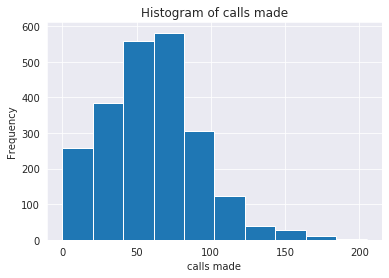

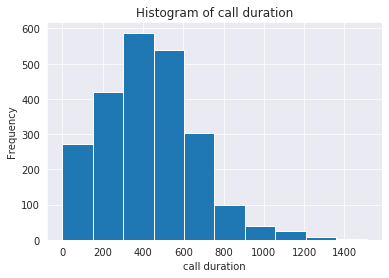

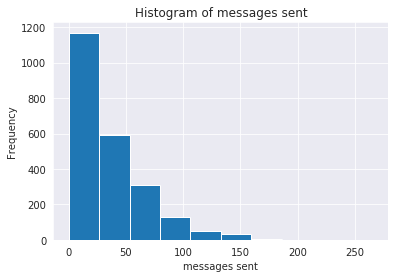

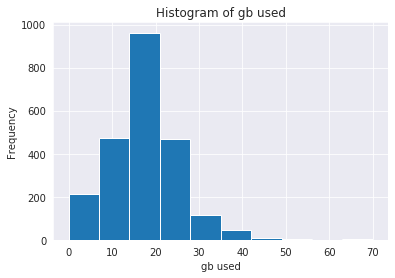

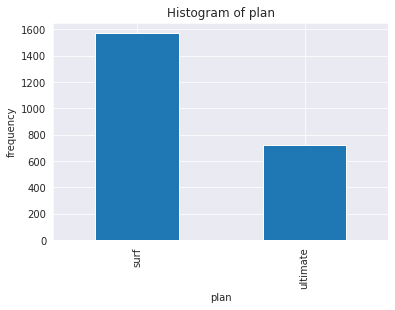

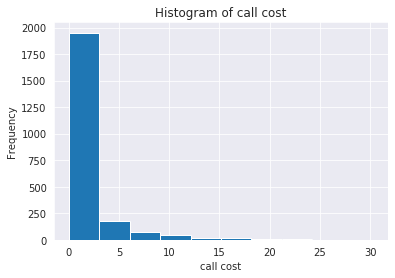

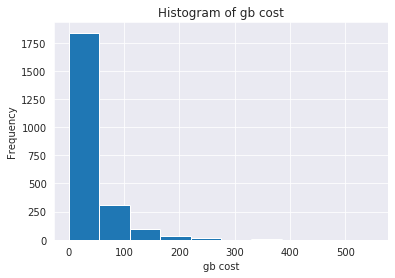

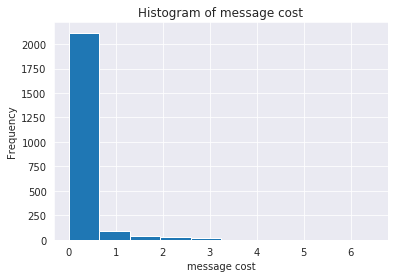

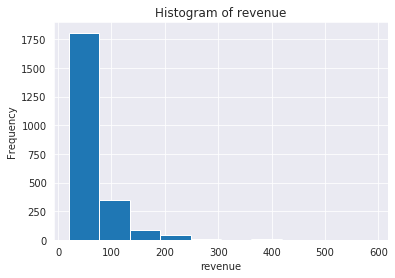

In [22]:
# create histogram and bar chart
for column in plot_data:
    plt.figure(column);
    plt.xlabel(column);
    plt.ylabel('frequency');
    plt.title('Histogram of ' + column);
    if is_numeric_dtype(plot_data[column]):
        agg_df[column].plot(kind = 'hist');
    elif is_string_dtype(plot_data[column]):
        agg_df[column].value_counts().plot(kind = 'bar')
plt.show();

<b style="font-size: 20px;">Intermediate conclusions</b>

We used a loop through the columns of our datasets and create a plot for each column.

by using histogram to plot numerical variables and a bar plot for categorical variables.

the plot show the frequency distribution in our data.

All the charts above with the exception of the `histogram of plan` show that the distribution is somewhat **skewed right**

In our `messages sent` histogram , the most messages sent is between 0 to 266.

At **standard deviation** of 34, since the **mean** at 33 which is greater than our **median** at 26, we can conclude that the our data has some outliers.

We also noticed that more users prefer the "basic" plan **surf** , on the more expansive **ultimate** plan. 

We need to further analyze the data to determine which plan brings in more revenue.

Since our data is skewed, we would have to detect and remove outliers in the data.

<br>
<b style="font-size: 15px;">Outlier detection and removal</b>

Even our project didn't demend us to detect and remove outlier we prefer our data to be cleaner and more accurate if possible.

so we will determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue working with the filtered data. 

In [23]:
# upper limit of the outliers
telecom = agg_df[['calls made', 'call duration', 'messages sent', 'gb used', 'revenue']]
iqr = telecom.quantile(0.75) - telecom.quantile(0.25)
telecom_outliers_upper = telecom.quantile(0.75) + iqr*1.5
telecom_outliers_lower = telecom.quantile(0.25) - iqr*1.5
print('The inter-quartile range are - calls made: {}, call duration: {:.2f}, messages sent: {},  gb used: {:.2f}, and revenue: {:.2f}'.format(*iqr))
print()
print('The upper bound are - calls made: {}, call duration: {:.2f}, messages sent: {},  gb used: {:.2f}, and revenue: {:.2f}'.format(*telecom_outliers_upper))
print()
print('The lower bound are - calls made: {}, call duration: {:.2f}, messages sent: {},  gb used: {:.2f}, and revenue: {:.2f}'.format(*telecom_outliers_lower))

The inter-quartile range are - calls made: 41.0, call duration: 307.00, messages sent: 48.0,  gb used: 9.00, and revenue: 46.52

The upper bound are - calls made: 140.5, call duration: 1032.50, messages sent: 123.0,  gb used: 34.50, and revenue: 139.78

The lower bound are - calls made: -23.5, call duration: -195.50, messages sent: -69.0,  gb used: -1.50, and revenue: -46.30


The inter-quartile range are - calls made: 41.0, call duration: 307.00, messages sent: 48.0,  mb used: 9216.00, and revenue: 46.52

The upper bound are - calls made: 140.5, call duration: 1032.50, messages sent: 123.0,  mb used: 35328.00, and revenue: 139.78

The lower bound are - calls made: -23.5, call duration: -195.50, messages sent: -69.0,  mb used: -1536.00, and revenue: -46.30

In [24]:
# import stats from scipy
from scipy import stats

# z-score for 'calls made', 'call duration', 'messages sent', 'gb used', 'revenue'
stats.zscore(telecom)

array([[-1.36030011, -1.29210377, -0.65075944, -1.90880223,  0.1195998 ],
       [-1.57637953, -1.56721445,  3.10702167,  1.93731685,  0.41958002],
       [-1.79245895, -1.77460558, -0.53332878, -1.78059826,  0.1195998 ],
       ...,
       [-0.46511394, -0.51332891, -0.97369375,  0.01425731, -0.52321495],
       [-0.21816604, -0.18742856, -0.97369375,  0.39886922,  0.1195998 ],
       [-0.5885879 , -0.35249497, -0.97369375, -0.49855857, -0.95175811]])

In [25]:
# filtered dataset
telecom_filtered = telecom[(np.abs(stats.zscore(telecom)) < 3).all(axis=1)]
telecom_filtered = telecom_filtered.reset_index(drop=True, inplace=False)
telecom_filtered

,calls made,call duration,messages sent,gb used,revenue
0,16.0,124.0,11.0,2.0,70.0
1,2.0,10.0,15.0,3.0,70.0
2,85.0,634.0,26.0,15.0,70.0
3,63.0,446.0,37.0,24.0,70.0
4,71.0,476.0,21.0,17.0,70.0
...,...,...,...,...,...
2186,45.0,363.0,0.0,23.0,100.0
2187,65.0,496.0,0.0,22.0,90.0
2188,45.0,308.0,0.0,17.0,40.0
2189,53.0,385.0,0.0,20.0,70.0


In [26]:
# describe the filtered data
telecom_filtered.describe()

,calls made,call duration,messages sent,gb used,revenue
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,58.340484,416.820630,30.577362,16.304427,59.659448
std,30.152095,220.277704,29.843065,6.968551,35.120923
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,37.000000,260.000000,3.000000,12.000000,22.430000
50%,59.000000,418.000000,24.000000,17.000000,70.000000
75%,78.000000,562.000000,49.000000,21.000000,70.000000
max,155.000000,1131.000000,134.000000,40.000000,201.830000


<b style="font-size: 20px;">Histogram of selected parameters in before and after filtered data</b>

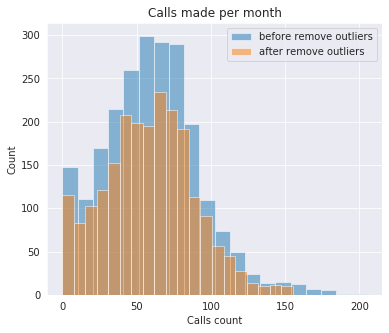

In [27]:
# histogram of number of calls per month
plt.figure(figsize=(6,5))
plt.hist(telecom['calls made'], bins=20, alpha=0.5, label='before remove outliers')
plt.hist(telecom_filtered['calls made'], bins=20, alpha=0.5, label='after remove outliers')

plt.xlabel('Calls count', size=10)
plt.ylabel('Count', size=10)
plt.title('Calls made per month')
plt.legend(loc='upper right');

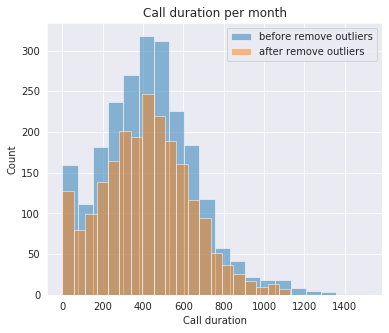

In [28]:
# histogram call duration per month
plt.figure(figsize=(6,5))
plt.hist(telecom['call duration'], bins=20, alpha=0.5, label='before remove outliers')
plt.hist(telecom_filtered['call duration'], bins=20, alpha=0.5, label='after remove outliers')

plt.xlabel('Call duration', size=10)
plt.ylabel('Count', size=10)
plt.title('Call duration per month')
plt.legend(loc='upper right');

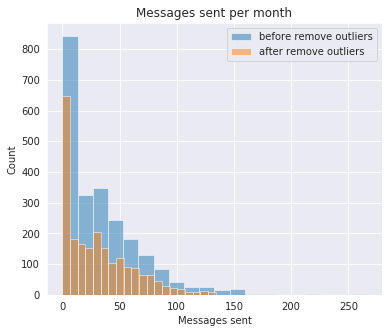

In [29]:
# histogram of number of calls per month
plt.figure(figsize=(6,5))
plt.hist(telecom['messages sent'], bins=20, alpha=0.5, label='before remove outliers')
plt.hist(telecom_filtered['messages sent'], bins=20, alpha=0.5, label='after remove outliers')

plt.xlabel('Messages sent', size=10)
plt.ylabel('Count', size=10)
plt.title('Messages sent per month')
plt.legend(loc='upper right');

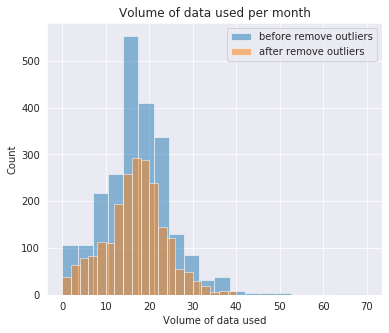

In [30]:
# histogram of number of calls per month
plt.figure(figsize=(6,5))
plt.hist(telecom['gb used'], bins=20, alpha=0.5, label='before remove outliers')
plt.hist(telecom_filtered['gb used'], bins=20, alpha=0.5, label='after remove outliers')

plt.xlabel('Volume of data used', size=10)
plt.ylabel('Count', size=10)
plt.title('Volume of data used per month')
plt.legend(loc='upper right');

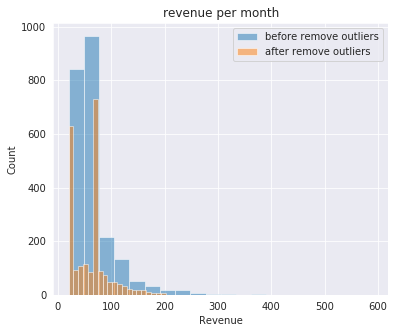

In [31]:
# histogram of number of calls per month
plt.figure(figsize=(6,5))
plt.hist(telecom['revenue'], bins=20, alpha=0.5, label='before remove outliers')
plt.hist(telecom_filtered['revenue'], bins=20, alpha=0.5, label='after remove outliers')

plt.xlabel('Revenue', size=10)
plt.ylabel('Count', size=10)
plt.title('revenue per month')
plt.legend(loc='upper right');

<b style="font-size: 20px;">Intermediate conclusions</b>

So we detected outlier in the data from the initial histogram plotted.

But before we removing our outliers, we had high values in the histogram of the data. 

And we hope by using the Z-score technique to removing the outliers, we observe from the histogram that the **mean** will be closer to the **median**, and the distribution of the data will be closer to a normal distribution than before.

For that we use the `stats` package in scipy to determine the Z-score and filter the data to obtain the distribution where the mean is 0 and the standard deviation is 1.

We have successfully removed outliers from the data. By looking at the statistics of the filtered data, we can see that outliers have been removed.

<br>
<b style="font-size: 20px;">Describe the `users` behavior</b>
<br><br>Find the minutes the users of each plan require per month

In [32]:
# minutes users of each plan require per month
agg_df.groupby('plan')['call duration'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


What's the difference in average `duration` for users in the two plans?

In [33]:
# difference in average monthly call duration
agg_df.groupby('plan')['call duration']. describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,428.749523,234.453150,0.0,272.0,425.0,576.00,1510.0
ultimate,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.0


We can see from the calculation above, we observe that the `users` in the `ultimate` plan spend more minutes per month than `users` in the `surf` plan.

Let's see if we get the same result if we remove outliers in the data.

In [34]:
# extract filtered data for the ultimate plan
ultimate_data = agg_df.query("plan == 'ultimate'")
ultimate_plan = ultimate_data[['calls made', 'call duration', 'messages sent', 'gb used', 'revenue']]

ultimate_plan_filtered = ultimate_plan[(np.abs(stats.zscore(ultimate_plan)) < 3).all(axis=1)]
ultimate_plan_filtered = ultimate_plan_filtered.reset_index(drop=True, inplace=False)
ultimate_plan_filtered.describe()

,calls made,call duration,messages sent,gb used,revenue
count,677.000000,677.000000,677.000000,677.000000,677.000000
mean,58.970458,418.196455,34.302806,16.508124,70.579025
std,29.979860,216.700769,31.274291,6.760178,3.743836
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,260.000000,5.000000,13.000000,70.000000
50%,60.000000,420.000000,28.000000,17.000000,70.000000
75%,78.000000,546.000000,56.000000,20.000000,70.000000
max,159.000000,1111.000000,139.000000,35.000000,105.000000


In [35]:
# variance of the ultimate plan
for column in ultimate_plan_filtered:
    print('Variance of the ' + column + ' is {: >5.2f}'.format(ultimate_plan_filtered[column].var()))

Variance of the calls made is 898.79
Variance of the call duration is 46959.22
Variance of the messages sent is 978.08
Variance of the gb used is 45.70
Variance of the revenue is 14.02


From the `describe()`, we can determined that `ultimate` user average 58 calls, use 418 minutes per month, sent ~34 messages, and use ~17gb of data per month.

The variance of the data for `ultimate` user is 898.79 calls made and 978 messages sent.

In [36]:
# extract filtered data for the surf plan
surf_data = agg_df.query("plan == 'surf'")
surf_plan = surf_data[['calls made', 'call duration', 'messages sent', 'gb used', 'revenue']]

surf_plan_filtered = surf_plan[(np.abs(stats.zscore(surf_plan)) < 3).all(axis=1)]
surf_plan_filtered = surf_plan_filtered.reset_index(drop=True, inplace=False)
surf_plan_filtered.describe()

,calls made,call duration,messages sent,gb used,revenue
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,58.357427,418.277188,28.301724,16.179708,55.586963
std,30.313364,222.179680,28.408758,6.931856,43.523318
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,38.000000,263.000000,2.000000,12.000000,20.000000
50%,59.000000,416.500000,23.000000,17.000000,40.000000
75%,78.000000,565.000000,44.000000,21.000000,80.000000
max,155.000000,1131.000000,130.000000,35.000000,224.230000


In [37]:
# variance for the surf plan
for column in surf_plan_filtered:
    print('Variance of ' + column + ' is: {: >5.2f}'.format(surf_plan_filtered[column].var()))

Variance of calls made is: 918.90
Variance of call duration is: 49363.81
Variance of messages sent is: 807.06
Variance of gb used is: 48.05
Variance of revenue is: 1894.28


Similarly `describe()` on the data for `surf` user, we can see that on the average user make 58 calls, use 418 minutes per month, sent about 28 messages, and use 16.6gb of data per month. 

The variance of the data for `surf` user is 918.90 calls made and 807 messages sent.

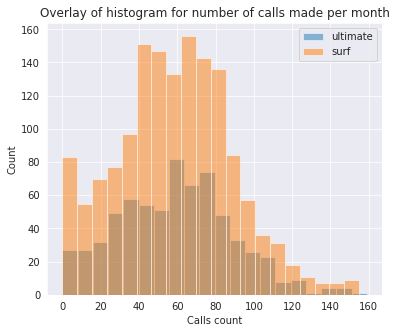

In [38]:
# histogram of number of calls per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['calls made'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['calls made'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Calls count', size=10)
plt.ylabel('Count', size=10)
plt.title('Overlay of histogram for number of calls made per month')
plt.legend(loc='upper right');

first plotted an overlay of histogram to visually compare the distribution of number of calls per month across plans.

And from the overlay of histogram plot, we can see that the `surf` plan had the most representation for the number of calls per month. 

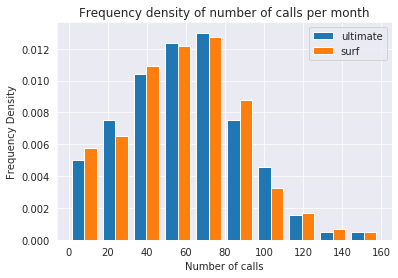

In [39]:
# density histogram showing frequency density of number of calls per month
plt.hist([ultimate_plan_filtered['calls made'], surf_plan_filtered['calls made']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Number of calls')
plt.title('Frequency density of number of calls per month');

When we compare the frequency density distribution of number of calls for each user per month in order to compare values across groups.

We did plotting a grouped density histogram where multiple distributions are plotted in a single plot.

Looking at the plot of `surf` plan had the most number of calls per month than the `ultimate` plan. 

With the frequency density plot, we can see the number of calls made per users across phone plan.

We can see at a glance that the `surf` plan has more number of calls than the `ultimate` plan.

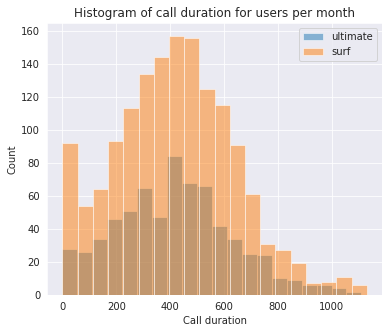

In [40]:
# histogram of call duration per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['call duration'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['call duration'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Call duration', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of call duration for users per month')
plt.legend(loc='upper right');

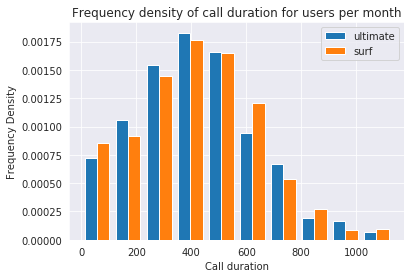

In [41]:
# density histogram showing frequency density of call duration per month
plt.hist([ultimate_plan_filtered['call duration'], surf_plan_filtered['call duration']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Call duration')
plt.title('Frequency density of call duration for users per month');

<b style="font-size: 20px;">Intermediate conclusions</b>

Overlay of histogram plot, we can see that `ultimate` plan has more call `duration` per month than users in the `surf` plan even though on the average users on the `surf` plan made more calls than users in the `ultimate` plan.

###### Find the messages the users of each plan send per month

In [42]:
# messages users of each plan send per month
agg_df.groupby('plan')['messages sent'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


What's the difference in average `message sent` for users in the two plans?

In [43]:
# difference in average monthly messages sent
agg_df.groupby('plan')['messages sent']. describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


As we can see the `users` of the `ultimate` plan on the average sends more messages per month than users of the `surf` plan.

Let's look at how this is distributed using the histogram plot

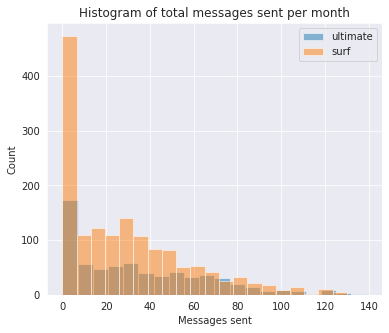

In [44]:
# histogram of messages sent each month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['messages sent'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['messages sent'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Messages sent', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of total messages sent per month')
plt.legend(loc='upper right');

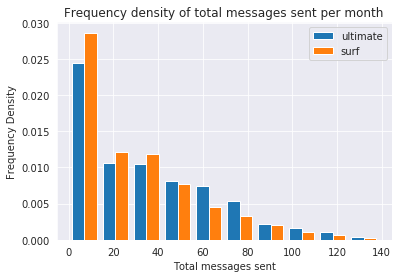

In [45]:
# density histogram showing frequency density of total messages sent each month
plt.hist([ultimate_plan_filtered['messages sent'], surf_plan_filtered['messages sent']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Total messages sent')
plt.title('Frequency density of total messages sent per month');

<b style="font-size: 20px;">Intermediate conclusions</b>

From the overlay the histogram showing the distribution of total `messages sent ` per month, we can see that `surf` plan had the most total `messages sent ` per month.

Corresponding frequency density plot, we can see that both plans had similar trend.

The `surf` plan had more users than the `ultimate` plan

###### Find the volume of data the users of each plan require per month

In [46]:
# volume of data users of each plan use per month
agg_df.groupby('plan')['gb used'].agg([np.mean, np.var, np.std])

,mean,var,std
plan,,,
surf,16.684679,61.654962,7.852067
ultimate,17.334722,58.940656,7.677282


What's the difference in average `data` for users in the two plans?

In [47]:
# difference in average monthly gb used
agg_df.groupby('plan')['gb used']. describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,16.684679,7.852067,0.0,12.0,17.0,21.0,70.0
ultimate,720.0,17.334722,7.677282,0.0,13.0,17.0,21.0,46.0


Our calculation show the average, `users` on the `ultimate` plan use more data than users on the `surf` plan.

Let's look at how this is distributed using the histogram plot and frquency distribution plot.

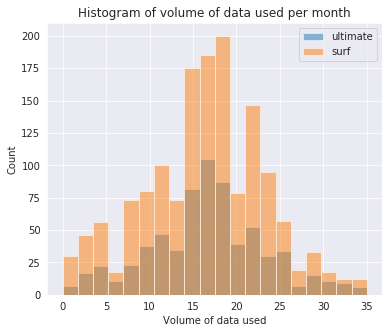

In [48]:
# histogram of volume of data used per month
plt.figure(figsize=(6,5))
plt.hist(ultimate_plan_filtered['gb used'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['gb used'], bins=20, alpha=0.5, label='surf')

plt.xlabel('Volume of data used', size=10)
plt.ylabel('Count', size=10)
plt.title('Histogram of volume of data used per month')
plt.legend(loc='upper right');

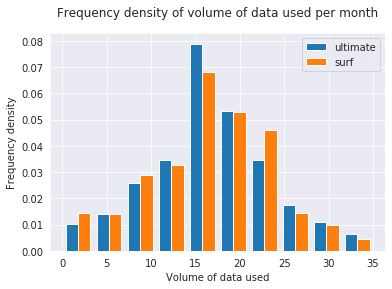

In [49]:
# density histogram showing frequency density of volume of data used per month
plt.hist([ultimate_plan_filtered['gb used'], surf_plan_filtered['gb used']], label= ['ultimate', 'surf'], density = True)
plt.legend()
plt.ylabel('Frequency density')
plt.xlabel('Volume of data used')
plt.title('Frequency density of volume of data used per month', y=1.05);

<b style="font-size: 20px;">Intermediate conclusions</b>

The histogram volume of `data` required per users per month across plans shows that the `surf` plan had more users based on volume of `data` required per month.

Corresponding frequency density plot, we can see that both plan have the same trend except that `ultimate` has more values for volume of `data` used per month. 

In [50]:
# average revenue for users of ultimate and surf plan
ultimate_avg = ultimate_plan_filtered['revenue'].sum() / len(ultimate_plan_filtered['revenue'])
surf_avg = surf_plan_filtered['revenue'].sum() / len(surf_plan_filtered['revenue'])
diff = (ultimate_avg - surf_avg) / ultimate_avg * 100
print('Average revenue for users in ultimate plan is: ${:.2f}'.format(ultimate_avg))
print()
print('Average revenue for users in surf plan is: ${:.2f}'.format(surf_avg))
print()
print('Difference Percentage between ultimate plan and surf plan revenue is: {:.2f}%'.format(diff))

Average revenue for users in ultimate plan is: $70.58

Average revenue for users in surf plan is: $55.59

Difference Percentage between ultimate plan and surf plan revenue is: 21.24%


<b style="font-size: 20px;">Intermediate conclusions</b>

We calculated the statistics of our datasets. We determined that `ultimate` users on the average make 58 calls, use 418 minutes per month, sent ~34 messages, and use 17gb of data per month.

We also computed statistics for `surf` users, and observed that on the average users on the average make 58 calls, use 418 minutes per month, sent ~28 messages, and use 16.6gb of data per month.

We plotted the distribution and the frequency density of the plans per user and observed that `surf` users have more representation overall than `ultimate` users.

Also, on the average, `ultimate` users has more call `duration` per month, send more text messages, require more data volume than users in the `surf` plan.

We also determined that users in the `ultimate` plan brought in more revenue on the average than users in the `surf` plan.

<br>
<b id="test_hypothesis" style="font-size: 25px;">IV - Test the hypothesis</b> 
<br>

<b style="font-size: 15px;">Test I (surf vs ultimate)</b>

**Null Hypothesis**: There is **no difference** between the average revenue from users of `ultimate` and `surf` calling plans.

After calculated the average revenue for `users` of `ultimate` calling plan as \$70.58 and the average revenue for the `surf` plan as \$55.59.

We want to know whether there is difference between these numbers are significant?

That depends on the variance of the samples the values are calculated from.

Instead of basing our comparison on the **mean** alone, we use the `data` to perform a statistical test.

In this experiment, the **null hypothesis** is that there is **no difference** between the average revenue from `users` of `ultimate` and `surf` calling plan.

The **alternative** hypothesis is that the average revenue from `users` of `ultimate` and `surf` calling plans differs.

We can carry out hypothesis testing to test the hypothesis.

We use alpha 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true.

We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another. 

- $H_0$ (null hypothesis): average revenue per month for **ultimate** users = average revenue per month for **surf** users


- $H_1$ (alternative hypothesis): average revenue per month for **ultimate** users <> average revenue per month for **surf** users


- $\alpha$ = 0.05
- If p-value < $\alpha$, then reject null hypothesis. If p-value > $\alpha$, fail to reject null hypothesis.

In [51]:
# hypothesis testing
ultimate = ultimate_plan_filtered['revenue']
surf = surf_plan_filtered['revenue']

# set critical statistical significance level
alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(ultimate, surf, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 3.868922487821801e-38
We reject the null hypohesis


We formulated the **null hypothesis** by stating that there is **no difference** between the average revenue from `users` of `ultimate` and `surf` calling plans.

We used alpha 0.05. Since the p-value is less than 0.05, it means that the group are different hence **we reject the null hypothesis**.

Our analysis suggest that average revenue from users of `ultimate` and `surf` calling plans differs. 

<b style="font-size: 15px;">Test II (NY - NJ vs Other states)</b>

**Null Hypothesis**: There is **no difference** between the average revenue from users in NY-NJ area and users from other states.

**Alternative Hypothesis**: There is **a difference** between the average revenue from users in NY-NJ area and `users` from other states.

We carry out hypothesis testing to test the hypothesis.

We use a alpha 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true.

We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

- $H_0$ (null hypothesis): average revenue for users in NY-NJ areas = average revenue for users from other regions


- $H_1$ (alternative hypothesis): average revenue for users in NY-NJ areas <> average revenue for users from other regions


- $\alpha$ = 0.05
- If p-value < $\alpha$, then reject null hypothesis. If p-value > $\alpha$, fail to reject null hypothesis.

In [52]:
ny_nj = agg_df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users in NY-NJ
other_states = agg_df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue'] # revenue of users not in NY-NJ
print('Average revenue users of NY-NJ area is: ${:.2f}'.format(ny_nj.mean()))
print('Average revenue users of other states is: ${:.2f}'.format(other_states.mean()))

Average revenue users of NY-NJ area is: $60.00
Average revenue users of other states is: $65.29


We determined that average revenue of users in NY-NJ area as : ( \$60 )

when the average revenue of users in other states as : ( \$65.29 ) 

We want to know whether the difference between these number is significant?

We use a alpha 0.05 for this hypothesis test, which means that only in 5% of the case will we reject the **null hypothesis** when it is true.

We use a t-test to test the hypothesis since it can be used to compare the means of two groups in order to determine whether the two groups are different from one another.

The set is shown in the code below.

In [53]:
# hypothesis testing

alpha = 0.05

# test the hypothesis that the means of the two independent population are equal
results = st.ttest_ind(ny_nj, other_states, equal_var = False)
print('The p-value is: {}'.format(results.pvalue))

# compare the p-value with the significance level
if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 0.03408041222493359
We reject the null hypohesis


<b style="font-size: 15px;">Intermediate conclusions</b>

We formulated our **null hypothesis** by stating that there is **no difference** between the average revenue from `users` in NY-NJ area and `users` from others states.

We used a t-test to test the hypothesis using alpha 0.05.

Since the p-value is less than 0.05, it means that the group are different hence **we reject the null hypothesis**.

We may not know the size of the difference between the average revenue from `users` in NY-NJ area and users from others regions.

All the test tells us is that they are different. However, by calculating the average number for revenue from `users` in both groups, we can say with certainty that the mean of the revenue between the two groups are significantly different. 

<br>
<b id="general_conclusion" style="font-size: 25px;">V - General conclusion</b>
<br>

<b><u>What is Prepaid service</u></b>

Prepaid service lets you pay in advance for monthly calls, text and data services for your mobile device with no option for long-term contract, like you'd have with a standard account (which gives you a bill for your usage at the end of each month), this mean that when the last day of the current year end the user prepaid service end too. 
<hr>
<b><u>INTRODUCTION</u></b>

In Project III , we work in a telecom operator Mega-line company as analyst and been request by our markting department to do full report on our prepaid service plans `surf` and `ultimate` so they will know how to adjust the annual advertising budget for the up coming year.
<hr>
<b><u>I - Open the data file and study the general information:</u></b>
<br>

**The `users` table (data on users):**

`user_id` — unique user identifier

`first_name` — user's name

`last_name` — user's last name

`age` — user's age (years)

`reg_date` — subscription date (dd, mm, yy)

`churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)

`city` — user's city of residence

`plan` — calling plan name
<br><br>


**The `calls` table (data on calls):**

`id` — unique call identifier

`call_date` — call date

`duration` — call duration (in minutes)

`user_id` — the identifier of the user making the call
<br><br>


**The `messages` table (data on texts):**

`id` — unique text message identifier

`message_date` — text message date

`user_id` — the identifier of the user sending the text
<br><br>

**The `internet` table (data on web sessions):**

`id` — unique session identifier

`mb_used` — the volume of data spent during the session (in megabytes)

`session_date` — web session date

`user_id` — user identifier
<br><br>

**The `plans` table (data on the plans):**

`plan_name` — calling plan name

`usd_monthly_fee` — monthly charge in US dollars

`minutes_included` — monthly minute allowance

`messages_included` — monthly text allowance

`mb_per_month_included` — data volume allowance (in megabytes)

`usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)

`usd_per_message` — price per text after exceeding the package limits

`usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)
<br><br>
When we first look at our datasets we notice that there is missing values , dtypes issues and few more errors that we need to deal with before we continue our project report.
<hr><br>
<b><u>II - Prepare the data</u></b>

Convert our issue columns from **Object** to **datetime** (`users Dataset`: `reg_date` , `churn_date` , `calls Dataset`: `call_date` , `messages Dataset`: `message_date` , `internet Dataset`: `session_date`)

Missing values : `users Dataset`: `churn_date` in this case we fillna 466 values with the last day of 2018 (our report year) since as we explan in the begining prepaid isn't long term contract that end in each year, so if the user won't be disconnected the server will do it for him.

Time issue: `calls Dataset`: `duration` show Seconds when our company calculates call time in minutes only so we round up the seconds into minutes. we also add column `call type` that show if the call "Answerd or Miss".
<hr><br>
<b><u>III - Analyze the data</u></b>

We analyzed the data by carrying out exploratory data analysis and found that the distribution of the data is slightly **skewed right**. 

We detected and removed some outliers from the data and used the filtered to compute the statistics.

Determined that `ultimate` users make average of 58 calls, use 418 minutes, sent ~34 text messages, and use 17gb of data per month. Vs `surf` users that make the same average of 58 calls, use 418 minutes, but sent only ~28 messages, and use 16.6gb of data per month. 

Plotted the distribution and the frequency density of the plans per user and observed that `surf` users have more call count overall than `ultimate` users.

On the average, `ultimate` users send more text messages and require more data and bring more revenue to the company ~ $\approx$ 21.4% greater than users in the `surf`plan (`ultimate` \$70.58 - `surf`\$55.59) 

When our average 2018 revenue per user a month is: \$64.42.

<hr><br>
<b><u>IV - Test the hypotheses</u></b>

for our first test hypothesis, we Formulated the **null hypothesis** by stating that there is **no difference** between the average revenue from `users` of `ultimate` and `surf` calling plans. Using the alpha 0.05 to calculate the p-value, From the test, we determined that the group are different hence we reject the null hypothesis.

The test suggested that average revenue from `users` of `ultimate` and `surf`calling plans differs.

for our secand test hypothesis , We also tested the **null hypothesis** by stating that there is **no difference** between the average revenue from users in **NY-NJ** area, to users from other states. 

Our hypothesis test shows that the average revenue from `users` in NY-NJ area, to users from other states are different.

Average revenue users is :(`NY-NJ` \$60 - `other states`\$65.29)


**We can conclude from this analysis that:**

- `ultimate` send more text messages, require more data and brings in more average revenue than users on the `surf` plan.

- the average revenue from users in other states is greater than revenue from users in the NY-NJ area.

- Our suggest is to offer `ultimate` plan package with more calls, text messages and internet data. 

- Also our company should invest in more advertisements in other states than the NY-NJ.

- `ultimate` more profitable than `surf` plan, but `surf` still the more affordble overall pack that users love and prefer.

<b style="font-size: 25px;">Overall conclusion</b> 

Regarding the users of the prepaid service in the `surf` and `ultimate` plans. That more users prefer the `surf` package and the total used between the two packages is quite similar use, although of course those who have the `ultimate` package use it more, the `ultimate` package is the most profitable for the company and it is recommended to invest in it in the next campaign maybe bigger overall package for lower price. So users that plan to buy prepaid `surf` plan or exist user of `surf` will upgreade next time. Also expand advertising to other states than NY-NJ.